### **Proyecto**

#### La base de datos a utilizar tiene los resultados de todos los partidos de fútbol jugados en todas las ediciones de copas del mundo de la FIFA hasta la fecha. El objetivo de este proyecto es intentar predecir las selecciones que tienen la mayor probabilidad de salir campeonas así como otras estadísticas relacionadas.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
matches=pd.read_csv('./matches_1930_2022.csv')

In [39]:
matches.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...


In [40]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   home_team                        964 non-null    object 
 1   away_team                        964 non-null    object 
 2   home_score                       964 non-null    int64  
 3   home_xg                          128 non-null    float64
 4   home_penalty                     35 non-null     float64
 5   away_score                       964 non-null    int64  
 6   away_xg                          128 non-null    float64
 7   away_penalty                     35 non-null     float64
 8   home_manager                     964 non-null    object 
 9   home_captain                     644 non-null    object 
 10  away_manager                     964 non-null    object 
 11  away_captain                     644 non-null    object 
 12  Attendance            

Eliminación de columnas no utilizadas, porque no ayudan a responder o sacar resultados

In [41]:
matches.drop(columns=["away_substitute_in_long","home_substitute_in_long","away_yellow_card_long","home_yellow_card_long","away_penalty_shootout_miss_long","home_penalty_shootout_miss_long","away_penalty_shootout_goal_long","home_penalty_shootout_goal_long","away_penalty_miss_long","home_penalty_miss_long","away_own_goal","home_own_goal","away_goal_long","home_goal_long","away_goal","home_goal","Year","Host","Notes","Referee","Date","Officials","Venue","Attendance"], inplace=True)

In [42]:
matches['home_team'] = matches['home_team'].replace('West Germany', 'Germany')
matches['away_team'] = matches['away_team'].replace('West Germany', 'Germany')
matches['home_team'] = matches['home_team'].replace('FR Yugoslavia', 'Yugoslavia')
matches['away_team'] = matches['away_team'].replace('FR Yugoslavia', 'Yugoslavia')


In [43]:
# Función para contar tarjetas
def contar_tarjetas(celda):
    if pd.isna(celda) or celda.strip() == '':
        return 0
    return len(celda.split('|'))

# Crear columnas nuevas directamente, sin usar apply row-wise
matches['home_total_reds'] = (
    matches['home_red_card'].apply(contar_tarjetas) +
    matches['home_yellow_red_card'].apply(contar_tarjetas)
)

matches['away_total_reds'] = (
    matches['away_red_card'].apply(contar_tarjetas) +
    matches['away_yellow_red_card'].apply(contar_tarjetas)
)

matches.head()


,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,Round,Score,home_penalty_goal,away_penalty_goal,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_total_reds,away_total_reds
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,Final,(4) 3–3 (2),Lionel Messi (P) · 23,Kylian Mbappé (P) · 80|Kylian Mbappé (P) · 118,NaN,NaN,NaN,NaN,0,0
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,Third-place match,2–1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,Semi-finals,2–0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,Semi-finals,3–0,Lionel Messi (P) · 34,NaN,NaN,NaN,NaN,NaN,0,0
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,Quarter-finals,1–0,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,1,0


In [44]:
# Función para determinar los resultados
def get_results(row):
    if row['home_score'] > row['away_score']:
        return 'Win', 'Lose'
    elif row['home_score'] < row['away_score']:
        return 'Lose', 'Win'
    else:
        # Empate en goles, revisamos penales
        if pd.isna(row['home_penalty']) or pd.isna(row['away_penalty']):
            return 'Draw', 'Draw'
        elif row['home_penalty'] > row['away_penalty']:
            return 'Win', 'Lose'
        elif row['home_penalty'] < row['away_penalty']:
            return 'Lose', 'Win'
        else:
            return 'Draw', 'Draw'

# Aplicar función
matches[['home_result', 'away_result']] = matches.apply(lambda row: pd.Series(get_results(row)), axis=1)

# Función para contar penaltis
def contar_goles_penalti(celda):
    if pd.isna(celda) or celda.strip() == "":
        return 0
    return len(celda.split('|'))

# Crear las nuevas columnas
matches['home_penalty_goals'] = matches['home_penalty_goal'].apply(contar_goles_penalti)
matches['away_penalty_goals'] = matches['away_penalty_goal'].apply(contar_goles_penalti)

matches.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_total_reds,away_total_reds,home_result,away_result,home_penalty_goals,away_penalty_goals
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,0,0,Win,Lose,1,2
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,0,0,Win,Lose,0,0
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,0,0,Win,Lose,0,0
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,0,0,Win,Lose,1,0
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,Walid Cheddira · 90+3,NaN,1,0,Win,Lose,0,0


In [45]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   home_team             964 non-null    object 
 1   away_team             964 non-null    object 
 2   home_score            964 non-null    int64  
 3   home_xg               128 non-null    float64
 4   home_penalty          35 non-null     float64
 5   away_score            964 non-null    int64  
 6   away_xg               128 non-null    float64
 7   away_penalty          35 non-null     float64
 8   home_manager          964 non-null    object 
 9   home_captain          644 non-null    object 
 10  away_manager          964 non-null    object 
 11  away_captain          644 non-null    object 
 12  Round                 964 non-null    object 
 13  Score                 964 non-null    object 
 14  home_penalty_goal     116 non-null    object 
 15  away_penalty_goal     8

In [46]:
target = (matches["home_result"] == "Win").astype(int)

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.ensemble import IsolationForest
import xgboost as xgb


In [48]:
matches['home_win'] = (matches['home_result'] == 'Win').astype(int)
matches['away_win'] = (matches['away_result'] == 'Win').astype(int)

# Seleccionamos las columnas relevantes (puedes ajustar)
features = [
    'home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
    'away_score', 'away_xg', 'away_penalty', 'Round', 'home_total_reds',
    'away_total_reds', 'home_penalty_goals', 'away_penalty_goals'
]

In [49]:
numerical_features = [
    'home_score', 'home_xg', 'home_penalty', 'away_score',
    'away_xg', 'away_penalty', 'home_total_reds', 'away_total_reds',
    'home_penalty_goals', 'away_penalty_goals'
]

categorical_features = [
    'home_team', 'away_team', 'Round'
]
matches_clean = matches[features].copy()

In [50]:
# Pipelines para variables numéricas y categóricas

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinamos todo en un ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])



# Modelo para predecir home_xg

In [51]:
X_home_xg = matches[features]
y_home_xg = matches['home_xg']

# Solo usamos filas que tienen datos
X_home_xg = X_home_xg[y_home_xg.notna()]
y_home_xg = y_home_xg.dropna()

Xh_train_xg, Xh_test_xg, yh_train_xg, yh_test_xg = train_test_split(X_home_xg, y_home_xg, test_size=0.2, random_state=42)

home_xg_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', xgb.XGBRegressor())
])

home_xg_pipeline.fit(Xh_train_xg, yh_train_xg)
yh_pred_xg = home_xg_pipeline.predict(Xh_test_xg)
matches['home_xg_pred'] = home_xg_pipeline.predict(matches[features])

print("Error cuadrático medio (home_xg):", mean_squared_error(yh_test_xg, yh_pred_xg))
print("R2:", r2_score(yh_test_xg, yh_pred_xg))


Error cuadrático medio (home_xg): 0.002042001269531864
R2: 0.9967305538518663


# Modelo para predecir away_xg

In [52]:
X_away_xg = matches[features]
y_away_xg = matches['away_xg']

# Solo usamos filas que tienen datos
X_away_xg = X_away_xg[y_away_xg.notna()]
y_away_xg = y_away_xg.dropna()

Xa_train_xg, Xa_test_xg, ya_train_xg, ya_test_xg = train_test_split(X_away_xg, y_away_xg, test_size=0.2, random_state=42)

away_xg_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', xgb.XGBRegressor())
])

away_xg_pipeline.fit(Xa_train_xg, ya_train_xg)
ya_pred_xg = away_xg_pipeline.predict(Xa_test_xg)
matches['away_xg_pred'] = away_xg_pipeline.predict(matches[features])

print("Error cuadrático medio (away_xg):", mean_squared_error(ya_test_xg, ya_pred_xg))
print("R2:", r2_score(ya_test_xg, ya_pred_xg))

Error cuadrático medio (away_xg): 0.013994665426861232
R2: 0.9815201417604786


# Modelo para predecir si home gana

In [53]:
X_home_win = matches[features]
y_home_win = matches['home_win']

Xhome_w_train, Xhome_w_test, yhome_w_train, yhome_w_test = train_test_split(X_home_win, y_home_win, test_size=0.2, random_state=42)

home_win_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', xgb.XGBClassifier( eval_metric='logloss'))
])

home_win_pipeline.fit(Xhome_w_train, yhome_w_train)
yhome_w_pred = home_win_pipeline.predict(Xhome_w_test)
matches['home_win_prob'] = home_win_pipeline.predict_proba(matches[features])[:, 1]

print(classification_report(yhome_w_test, yhome_w_pred))

# Obtener probabilidades
prob_win = home_win_pipeline.predict_proba(Xhome_w_test)[:, 1]
print("Probabilidades de victoria de cada selección:")
print(prob_win[:5])


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        94
           1       0.99      0.99      0.99        99

    accuracy                           0.99       193
   macro avg       0.99      0.99      0.99       193
weighted avg       0.99      0.99      0.99       193

Probabilidades de victoria de cada selección:
[0.9966605 0.3318792 0.9975758 0.9994747 0.9983924]


In [54]:
# Agrupar por selección
summary_home = matches.groupby('home_team').agg({
    'home_win_prob': ['mean'],
    'home_xg_pred': ['mean'],
    'home_result': lambda x: (x == 'Win').mean(),  # Win rate real
    'home_score': ['mean']  # Goles reales promedio
}).round(2)

# Renombrar columnas
summary_home.columns = ['avg_win_prob', 'avg_xg_pred', 'real_win_rate', 'avg_goals']
summary_home = summary_home.sort_values('avg_win_prob', ascending=False)
summary_home = summary_home.rename_axis('team').reset_index()

print(summary_home.head(25))  # Mejores selecciones según modelo



                      team  avg_win_prob  avg_xg_pred  real_win_rate  \
0                   Norway          1.00         1.40           1.00   
1   Bosnia and Herzegovina          1.00         1.40           1.00   
2                  Ukraine          1.00         1.40           1.00   
3                  Türkiye          1.00         1.40           1.00   
4           Czechoslovakia          0.90         1.40           0.90   
5                  Hungary          0.83         1.40           0.83   
6               Yugoslavia          0.77         1.40           0.76   
7                   Brazil          0.76         1.49           0.78   
8                 Portugal          0.76         1.45           0.76   
9             Soviet Union          0.75         1.40           0.72   
10                 Austria          0.75         1.40           0.75   
11               Argentina          0.74         1.45           0.75   
12                 Germany          0.72         1.42           

# Modelo para predecir si away gana

In [55]:
X_away_win = matches[features]
y_away_win = matches['away_win']

Xaway_w_train, Xaway_w_test, yaway_w_train, yaway_w_test = train_test_split(X_away_win, y_away_win, test_size=0.2, random_state=42)

away_win_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', xgb.XGBClassifier( eval_metric='logloss'))
])

away_win_pipeline.fit(Xaway_w_train, yaway_w_train)
yaway_w_pred = away_win_pipeline.predict(Xaway_w_test)
matches['away_win_prob'] = away_win_pipeline.predict_proba(matches[features])[:, 1]

print(classification_report(yaway_w_test, yaway_w_pred))

# Obtener probabilidades
prob_win = away_win_pipeline.predict_proba(Xaway_w_test)[:, 1]
print("Probabilidades de victoria de cada selección:")
print(prob_win[:5])


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       140
           1       0.98      0.94      0.96        53

    accuracy                           0.98       193
   macro avg       0.98      0.97      0.97       193
weighted avg       0.98      0.98      0.98       193

Probabilidades de victoria de cada selección:
[3.1588742e-04 1.0611496e-02 1.1755534e-04 8.8568566e-05 3.7531584e-04]


In [56]:
# Agrupar por selección
summary_away = matches.groupby('away_team').agg({
    'away_win_prob': ['mean'],
    'away_xg_pred': ['mean'],
    'away_result': lambda x: (x == 'Win').mean(),  # Win rate real
    'away_score': ['mean']  # Goles reales promedio
}).round(2)

# Renombrar columnas
summary_away.columns = ['avg_win_prob', 'avg_xg_pred', 'real_win_rate', 'avg_goals']
summary_away = summary_away.sort_values('avg_win_prob', ascending=False)
summary_away = summary_away.rename_axis('team').reset_index()

print(summary_away.head(25))  # Mejores selecciones según modelo

                   team  avg_win_prob  avg_xg_pred  real_win_rate  avg_goals
0        Czech Republic          1.00         1.09           1.00       3.00
1               Senegal          0.63         1.17           0.62       1.62
2               Croatia          0.53         1.16           0.55       1.40
3           Netherlands          0.50         1.18           0.50       1.77
4               Jamaica          0.50         1.12           0.50       1.00
5               Denmark          0.49         1.08           0.46       1.31
6               Germany          0.47         1.34           0.47       1.88
7                Brazil          0.45         1.31           0.45       1.66
8               Ukraine          0.45         1.37           0.50       1.00
9                 Spain          0.43         1.16           0.42       1.42
10               France          0.40         1.11           0.40       1.34
11                Ghana          0.40         1.12           0.40       1.40

### **Combinando los resultados de home y away para dar un resultado por selección**

In [57]:
# Unir ambos resúmenes
combined = pd.concat([summary_home, summary_away], axis=0)

# Agrupar nuevamente por selección y sacar promedio
summary_total = combined.groupby('team').agg({
    'avg_win_prob': 'mean',
    'avg_xg_pred': 'mean',
    'real_win_rate': 'mean',
    'avg_goals': 'mean'
}).round(2)

# Ordenar por win probability o xG
summary_total = summary_total.sort_values('avg_win_prob', ascending=False)

print(summary_total.head(10))


                        avg_win_prob  avg_xg_pred  real_win_rate  avg_goals
team                                                                       
Ukraine                         0.72         1.38           0.75       1.00
Türkiye                         0.68         1.24           0.69       3.12
Germany                         0.60         1.38           0.60       2.01
Brazil                          0.60         1.40           0.62       1.94
Norway                          0.58         1.24           0.57       0.93
Netherlands                     0.56         1.26           0.55       1.75
France                          0.55         1.32           0.55       1.84
Croatia                         0.55         1.30           0.57       1.45
Argentina                       0.52         1.31           0.53       1.56
Bosnia and Herzegovina          0.50         1.24           0.50       1.75


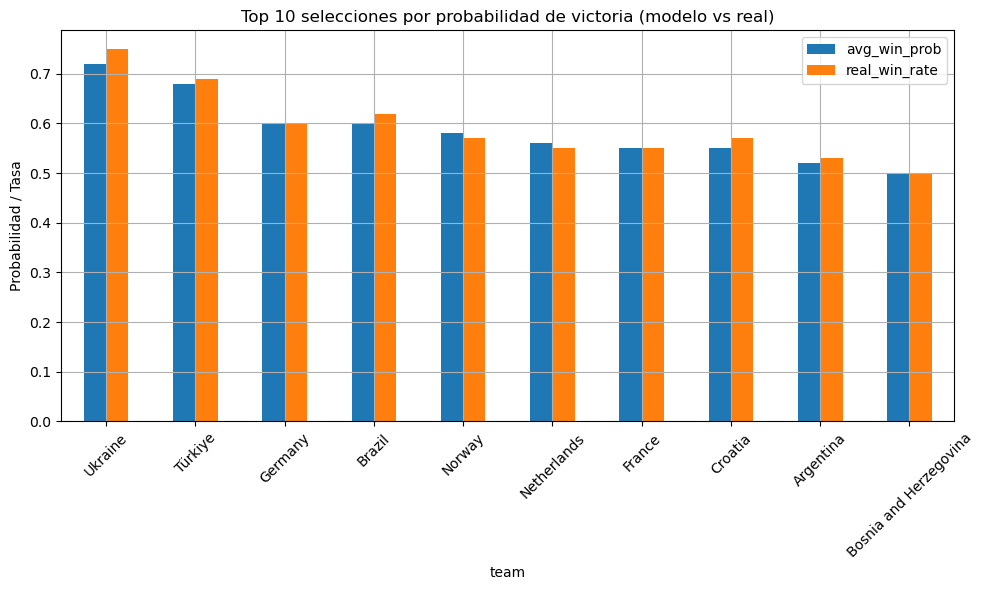

In [58]:
summary_total.head(10)[['avg_win_prob', 'real_win_rate']].plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 selecciones por probabilidad de victoria (modelo vs real)')
plt.ylabel('Probabilidad / Tasa')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# **Predicción del impacto de una tarjeta roja en un equipo**


In [59]:
# Subset para el equipo local
home_df = matches[['home_team', 'home_total_reds', 'home_result']].copy()
home_df.columns = ['team', 'total_reds', 'result']
home_df['is_home'] = 1

# Subset para el equipo visitante
away_df = matches[['away_team', 'away_total_reds', 'away_result']].copy()
away_df.columns = ['team', 'total_reds', 'result']
away_df['is_home'] = 0

# Unir ambos en un solo dataset
red_cards_df = pd.concat([home_df, away_df], axis=0).reset_index(drop=True)

# Convertir resultado a binario: Win = 1, Lose/Draw = 0
red_cards_df['win'] = red_cards_df['result'].apply(lambda x: 1 if x == 'Win' else 0)


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Separar variables
X = red_cards_df[['total_reds']]
y = red_cards_df['win']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Crear pipeline
red_card_model = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('classifier', LogisticRegression())
])

# Entrenar modelo
red_card_model.fit(X_train, y_train)

# Evaluar
y_pred = red_card_model.predict(X_test)
y_prob = red_card_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.59      1.00      0.74       229
           1       0.00      0.00      0.00       157

    accuracy                           0.59       386
   macro avg       0.30      0.50      0.37       386
weighted avg       0.35      0.59      0.44       386

ROC AUC Score: 0.5392317748171224


c:\Users\aleja\anaconda3\envs\Analitica2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aleja\anaconda3\envs\Analitica2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aleja\anaconda3\envs\Analitica2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

c:\Users\aleja\anaconda3\envs\Analitica2025\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


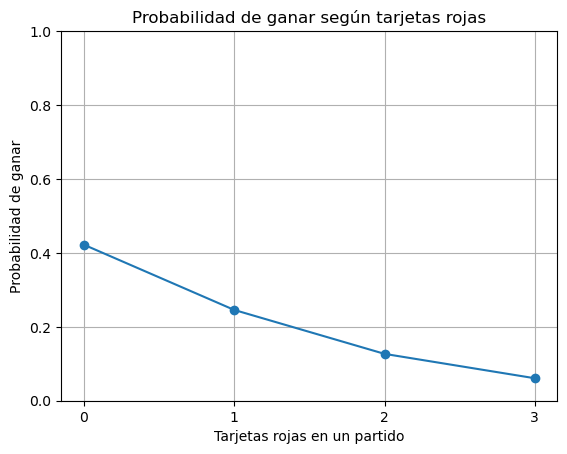

In [61]:
import numpy as np
import matplotlib.pyplot as plt

reds_range = np.arange(0, 4).reshape(-1, 1)
predicted_probs = red_card_model.predict_proba(reds_range)[:, 1]

plt.plot(reds_range, predicted_probs, marker='o')
plt.title("Probabilidad de ganar según tarjetas rojas")
plt.xlabel("Tarjetas rojas en un partido")
plt.ylabel("Probabilidad de ganar")
plt.grid(True)
plt.xticks(reds_range.flatten())
plt.ylim(0, 1)
plt.show()


# **Predicción del impacto de un penalty en un equipo**

In [62]:
# Local
home_df = matches[['home_team', 'home_penalty_goals', 'home_result']].copy()
home_df.columns = ['team', 'penalty_goals', 'result']
home_df['is_home'] = 1

# Visitante
away_df = matches[['away_team', 'away_penalty_goals', 'away_result']].copy()
away_df.columns = ['team', 'penalty_goals', 'result']
away_df['is_home'] = 0

# Unir ambos
penalty_df = pd.concat([home_df, away_df], axis=0).reset_index(drop=True)

# Crear variable binaria: hizo al menos un gol de penalti
penalty_df['scored_penalty'] = penalty_df['penalty_goals'].fillna(0).astype(int) > 0

# Variable objetivo: ganó o no
penalty_df['win'] = penalty_df['result'].apply(lambda x: 1 if x == 'Win' else 0)


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Variables
X = penalty_df[['scored_penalty']]
y = penalty_df['win']

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Pipeline con regresión logística
penalty_model = Pipeline([
    ('classifier', LogisticRegression())
])

# Entrenar modelo
penalty_model.fit(X_train, y_train)

# Evaluar
y_pred = penalty_model.predict(X_test)
y_prob = penalty_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.61      0.94      0.74       229
           1       0.60      0.13      0.22       157

    accuracy                           0.61       386
   macro avg       0.61      0.54      0.48       386
weighted avg       0.61      0.61      0.53       386

ROC AUC Score: 0.5363112953022001


c:\Users\aleja\anaconda3\envs\Analitica2025\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


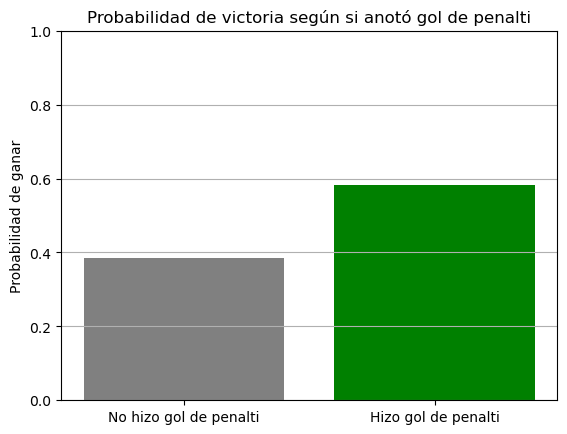

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Predicción para 0 y 1 (sin y con penalti anotado)
penalty_input = np.array([[0], [1]])
penalty_win_prob = penalty_model.predict_proba(penalty_input)[:, 1]

plt.bar(['No hizo gol de penalti', 'Hizo gol de penalti'], penalty_win_prob, color=['gray', 'green'])
plt.ylabel('Probabilidad de ganar')
plt.title('Probabilidad de victoria según si anotó gol de penalti')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()


# **Detección de Anomalias**

In [65]:
matches_anomaly = matches[numerical_features].fillna(0)

In [66]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
matches_anomaly['anomaly_score'] = iso_forest.fit_predict(matches_anomaly)

# Los -1 son anómalos, 1 son normales
matches['is_anomaly'] = matches_anomaly['anomaly_score']

In [67]:
anomalies = matches[matches['is_anomaly'] == -1]  # si usaste Isolation Forest o LOF
# o == 1 si usaste Z-score
anomalies[['home_team', 'away_team', 'home_score', 'away_score', 'home_total_reds', 'away_total_reds',"home_result","away_result"]]


,home_team,away_team,home_score,away_score,home_total_reds,away_total_reds,home_result,away_result
0,Argentina,France,3,3,0,0,Win,Lose
6,Croatia,Brazil,1,1,0,0,Win,Lose
7,Netherlands,Argentina,2,2,1,0,Lose,Win
10,Japan,Croatia,1,1,0,0,Lose,Win
11,Brazil,Korea Republic,4,1,0,0,Win,Lose
18,Cameroon,Brazil,1,0,1,0,Win,Lose
22,Costa Rica,Germany,2,4,0,0,Lose,Win
33,Korea Republic,Ghana,2,3,1,0,Lose,Win
53,Germany,Japan,1,2,0,0,Lose,Win
54,Spain,Costa Rica,7,0,0,0,Win,Lose
